<a class="anchor" id="0"></a>

# **Modelo ARIMA para el pronóstico de series temporales**

Discutiremos el **Modelo ARIMA para el pronóstico de series temporales**. 
- El modelo ARIMA se usa para pronosticar una serie temporal utilizando los valores pasados ​​de la serie. 
- Construiremos un **Modelo ARIMA óptimo** y lo ampliaremos a **ARIMA de temporada (Sarima)** y **Modelos Sarimax**. 
- También veremos cómo construir modelos Autoarima.

<a class="anchor" id="0.1"></a>
# **Tabla de contenido** 


1. [Introducción al pronóstico de la serie temporal](#1)
2. [Introducción a los modelos ARIMA](#2)
3. [El significado de p, d y q en el modelo ARIMA](#3)
4. [Modelos AR y MA](#4)
5. [Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA](#5)
6. [Cómo encontrar el orden del término AR (p)](#6)
7. [Cómo encontrar el orden del término MA (q)](#7)
8. [Cómo manejar si una serie de tiempo está ligeramente debajo o más diferenciada](#8)
9. [Cómo construir el modelo ARIMA](#9)
10. [Encuentre el modelo ARIMA óptimo utilizando validación cruzada fuera del tiempo](#10)
11. [Métricas de precisión para el pronóstico de series de tiempo](#11)
12. [Previsión automática de ARIMA en Python](#12)
13. [Cómo interpretar los gráficos residuales en el modelo ARIMA](#13)
14. [Modelo Sarima en Python](#14)
15. [Modelo Sarimax con variables exogéneas](#15)
16. [Referencias](#16)

# **1.Introducción al pronóstico de series temporales** <a class="anchor" id="1"></a>

[Tabla de contenido](#0.1)


- Una  **serie temproal** se define como una serie de puntos de datos registrados en diferentes intervalos de tiempo. El orden de tiempo puede ser diario, mensual o incluso anual.

- El pronóstico de series temporales es el proceso de usar un modelo estadístico para predecir valores futuros de una serie temporal basada en resultados pasados.

- El pronóstico es el paso en el que queremos predecir los valores futuros que tomará la serie. El pronóstico de una serie de tiempo a menudo es de tremendo valor comercial.

#### **Previsión de una serie temporal se puede dividir ampliamente en dos tipos.**

- Si usamos solo los valores anteriores de la serie temporal para predecir sus valores futuros, se llama **pronóstico de series temporales univariadas.**

- Si usamos otros predictores (como variables exógenas) para pronosticar que se llama **pronóstico de series temporales de variedades múltiples.**

Aquí nos centraremos en un tipo particular de método de pronóstico llamado **modelado ARIMA.**

# **2. Introducción a los modelos ARIMA** <a class="anchor" id="2"></a>

[Tabla de contenido](#0.1)


**ARIMA** significa **Autoregressive Integrated Moving Average Model (Modelo de promedio móvil integrado autorregresivo)**.
- Pertenece a una clase de modelos que explica una serie temproal dada, basada en sus propios valores pasados: sus propios retrasos y los errores de pronóstico rezagados.
- La ecuación se puede usar para pronosticar valores futuros.
- Cualquier serie temporal "no estacional" que exhiba patrones y no sea un ruido blanco aleatorio se puede modelar con modelos ARIMA.
- Es un algoritmo de pronóstico basado en la idea de que la información en los valores pasados ​​de la serie temporal se puede usar por sí sola para predecir los valores futuros.


- **Los modelos ARIMA** se especifican mediante tres parámetros de orden: (p, d, q), 

dónde,
- *p* es el orden del término AR
- *q* es el orden del término MA
- *d* es el número de diferenciación requerida para hacer la serie temproal estacionaria


- **AR (p) Autorregresión** - Un modelo de regresión que utiliza la relación dependiente entre una observación actual y observaciones durante un período anterior.Un componente auto regresivo (AR (p)) se refiere al uso de valores pasados ​​en la ecuación de regresión para la serie temporal.


- **I (d) Integración** - utiliza la diferenciación de las observaciones (restando una observación de la observación en el paso de tiempo anterior) para hacer la serie temproal estacionaria.
   - La diferenciación implica la resta de los valores actuales de una serie con sus valores anteriores d número de veces.


- **MA (q) Promedio móvil** - Un modelo que utiliza la dependencia entre una observación y un error residual de un modelo de promedio móvil aplicado a observaciones rezagadas.
   - Un componente de promedio móvil representa el error del modelo como una combinación de términos de error anteriores.
   - El orden q representa el número de términos que se incluirán en el modelo.

## **Tipos de modelos ARIMA**


- **ARIMA** : Promedios móvil integrados NO estacionales autorregresivos
- **SARIMA** : Arima estacional
- **SARIMAX** : Arima estacional con variables exógenas



Si es una serie temporal, tiene patrones estacionales, entonces necesitamos agregar términos estacionales y se convierte en sarima, abreviatura de **Seasonal ARIMA**.

# **3. El significado de p, d y q en el modelo ARIMA** <a class="anchor" id="3"></a>

[Tabla de contenido](#0.1)


## **3.1 El significado de p**


- `p` es el orden del término **Auto regresivo (AR)**. Se refiere al número de retrasos (lags) de Y para ser utilizados como predictores.



## **3.2 El significado de d**


- El término **auto regresivo** en Arima significa que es un modelo de regresión lineal que usa sus propios retrasos como predictores. 
    - Los modelos de regresión lineal, como sabemos, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.
    - Así que necesitamos hacer la serie temporal estacionaria.

- El enfoque más común para hacer que la serie sea estacionaria es diferirla.
    - Es decir, restar el valor anterior del valor actual.
    - A veces, dependiendo de la complejidad de la serie, puede ser necesaria más de una diferencia.


- El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para hacer que la serie sea estacionario.
    - Si la serie temporal ya es estacionaria, entonces d = 0.


## **3.3 El significado de q**


- **q** es el orden del **promedio móvil (MA)**.
- Se refiere al número de errores de pronóstico rezagados que deberían ir en el modelo ARIMA.

# **4. Modelos AR y MA** <a class="anchor" id="4"></a>

[Tabla de contenido](#0.1)



## **4.1 Modelo AR**

- Un **Modelo Auto regresivo (AR)** es uno donde Yt depende solo de sus propios retrasos. 

- Es decir, Yt es una función de los `retrasos de YT`. Se representa por la siguiente ecuación -

![AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1)


image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1


dónde, 

- $Y{t-1}$ es el lag1 de la serie, 

- $\beta1$ es el coeficiente de lag1 que estima el modelo, y

- $\alpha$ es el término de intercepción, también estimado por el modelo.





## **4.2 Modelo MA**


- Del mismo modo, un **modelo de promedio móvil (MA)** es uno donde Yt depende solo de los errores de pronóstico retrasados. Se representa por la siguiente ecuación:


![MA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1)


Fuente de la imagen: https://www.machinelearningplus.com/wp-content/uploads/2019/02/equation-2-min.png?ezimgfmt=ng:webp/ngcb1



donde los términos de error son los errores de los modelos autorregresivos de los retrasos respectivos. 


Los errores Et y E(t-1) son los errores de las siguientes ecuaciones:


![Error Terms of the AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1)

Fuente de la imagen: https://www.machinelearningplus.com/wp-content/uploads/2019/02/equation-3-min.png?ezimgfmt=ng:webp/ngcb1


## **4.3 Modelo ARIMA**


- Un modelo ARIMA es uno en el que la serie temporal se diferenció al menos una vez para hacerlo estacionario y combinamos los términos AR y MA.
- Entonces la ecuación de un modelo ARIMA se convierte en:

![ARIMA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1



### **Modelo ARIMA en palabras**:


Yt predecido = constante + combinación lineal de retrasos de Y (hasta p retrasos) + combinación lineal de errores de pronóstico rezagados (hasta q retrasos)


# **5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA**  <a class="anchor" id="5"></a>

[Tabla de contenido](#0.1)


- Como se indicó anteriormente, el propósito de diferenciar es hacer a la serie temporal estacionario. 
    - Pero debemos tener cuidado de sobre diferenciar. 
    - Una serie sobre diferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

- Por tanto, debemos determinar el orden correcto de diferenciación.
    - El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y la gráfica ACF llega a cero bastante rápido.
    - Si las autocorrelaciones son positivas para muchos retrasos (10 o más), entonces la serie necesita una mayor diferenciación. 
    - Por otro lado, si la autocorrelación de lag 1 en sí es demasiado negativa, entonces la serie probablemente esté demasiado diferenciada.


- Si realmente no podemos decidir entre dos órdenes de diferenciación, entonces vamos con el orden que da la menor desviación estándar en la serie diferenciada.



Ahora, explicaremos estos conceptos con la ayuda de un ejemplo de la siguiente manera:
- Primero, verificaré si la serie es estacionaria usando la **Prueba aumentada de Dickey Fuller (prueba ADF)**, del paquete `statsmodels`. 
    - La razón es que necesitamos diferenciar solo si la serie no es estacionaria.
    - De lo contrario, no se necesita diferenciar, es decir, d = 0.

- La hipótesis nula (Ho) de la prueba ADF es que la serie temporal no es estacionaria.
    - Entonces, si el valor p de la prueba es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula e inferimos que la serie temporal es realmente estacionaria.

- En nuestro caso, si "Valor de P > 0.05" seguimos para encontrar el orden de diferenciación.

## **Configuración de rutina**

In [ ]:
import numpy as np
import pandas as pd

## **Importar datos**

In [ ]:
path = './dataset.txt'

df = pd.read_csv(path)

df.head()

- Ahora, continuaremos con nuestro ejemplo.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

- Dado que el valor de p (1.00) es mayor que el nivel de significancia (0.05), diferenciaremos la serie y veremos cómo se ve la gráfica de autocorrelación.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

- Para los datos anteriores, podemos ver que la serie de tiempo alcanza la estacionariedad con dos órdenes de diferenciación.



# **6. Cómo encontrar el orden del término AR (p)** <a class="anchor" id="6"></a>

[Tabla de contenido](#0.1)


- El siguiente paso es identificar si el modelo necesita algún término AR. Descubriremos el número requerido de términos AR inspeccionando el **grafico de Autocorrelación parcial (PACF)**.


- La **autocorrelación parcial** puede imaginarse como la correlación entre la serie y su retraso, después de excluir las contribuciones de los retrasos intermedios. 
    - PACF transmite la correlación pura entre un retraso y la serie.
    - De esta manera, sabremos si ese retraso es necesario en el término AR o no.


- La autocorrelación parcial del retraso (k) de una serie es el coeficiente de ese retraso en la ecuación de autorregresión de Y.

$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- Es decir, supongamos, si Y_tT es la serie real e Y_t-1 es el retraso 1 de y, entonces la autocorrelación parcial de lag 3 (Y_t-3) es el coeficiente $\alpha_3$ de Y_t-3 en la ecuación anterior.

- Ahora, deberíamos encontrar el número de términos AR. 
    - Cualquier autocorrelación en una serie estacionarizada puede rectificarse agregando suficientes términos AR.
    - Por lo tanto, inicialmente tomamos el orden del término AR para que sea igual a tantos retrasos que cruzan el límite de significación en la gráfica PACF.


In [ ]:
# PACF de la primera serie diferenciada
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

- Podemos ver que el lag 1 PACF es bastante significativo ya que está muy por encima de la línea de significancia. 
- Por tanto, fijamos el valor de p en 1.

# **7. Cómo encontrar el orden del término de MA (q)** <a class="anchor" id="7"></a>

[Tabla de contenido](#0.1)


- Al igual que miramos la trama PACF para obtener el número de términos AR, veremos el gráfico **ACF** para el número de términos de MA.
    - Un término MA es técnicamente, el error del pronóstico rezagado.


- El ACF dice cuántos términos de MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.


- Veamos el gráfico de autocorrelación de la serie diferenciada.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

- Podemos ver que un par de retrasos están muy por encima de la línea de significancia.
    - Por tanto, arreglaremos q = 2. 
    - Si hay dudas, tiraremos con el modelo más simple que explica suficientemente el Y.

# **8. Cómo manejar si una serie de tiempo está ligeramente sub o sobre diferenciado** <a class="anchor" id="8"></a>

[Tabla de contenido](#0.1)


- Puede suceder que la serie de tiempo esté ligeramente sub-diferenciada. 
    - Diferenciarlo una vez más lo hará ligeramente sobre-diferenciado. 

- Si la serie está ligeramente sub-diferenciada, agregar uno o más términos AR adicionales generalmente la convierte.
    - Del mismo modo, si está ligeramente sobre-diferenciado, intentaremos agregar un término MA adicional.

# **9. Cómo construir el modelo ARIMA** <a class="anchor" id="9"></a>


[Tabla de contenido](#0.1)


Ahora, hemos determinado los valores de p, d y q. Tenemos todo lo necesario para adaptarse al modelo ARIMA.

- Usaremos la implementación ARIMA() del paquete `statsmodels`.

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Sat, 08 Mar 2025   AIC                            857.140
Time:                        17:48:33   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

- So, we will rebuild the model without the MA2 term.

In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

- The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

- Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [ ]:
# errores residuales
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- Los errores residuales parecen estar bien con una media casi cero y una varianza uniforme.
- Grafiquemos los valores reales contra los valores ajustados usando **plot_predict()**.

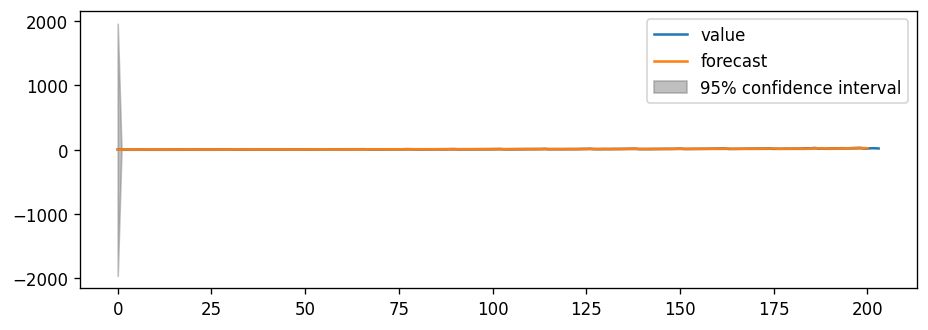

In [22]:
from statsmodels.graphics.tsaplots import plot_predict


# Actual vs Fitted
plot_predict(model_fit, 0, 200, dynamic=False, ax=df.plot())

plt.show()

- Cuando establecemos dynamic=False, los valores retrasados ​​en la muestra se usan para la predicción.
    - Es decir, el modelo se entrena hasta el valor anterior para hacer la próxima predicción.
    - Esto puede hacer que el pronóstico ajustado y los reales se vean artificialmente bien.

- Parece que tenemos un modelo Arima decente.
    - Pero, no podemos decir que este es el mejor modelo ARIMA porque en realidad no hemos pronosticado el futuro y comparamos el pronóstico con el rendimiento real.

- La verdadera validación que necesitamos ahora es la validación cruzada fuera del tiempo (Out-of-Time cross-validation).

# **10. Encuentre el modelo ARIMA óptimo utilizando la validación cruzada fuera del tiempo** <a class="anchor" id="10"></a>


[Tabla de contenido](#0.1)


- En la validación cruzada fuera del tiempo, avanzamos hacia atrás en el tiempo y pronosticamos en el futuro a tantos pasos que tomamos en el pasado.
    - Luego comparamos el pronóstico con los valores reales. 
- Para hacerlo, crearemos el conjunto de datos de entrenamiento y prueba dividiendo la serie temporal en 2 partes contiguas en una proporción razonable basada en la frecuencia de tiempo de la serie.

In [23]:
from statsmodels.tsa.stattools import acf

# Crear entrenamiento y prueba
train = df.value[:85]
test = df.value[85:]

- Ahora, construiremos el modelo ARIMA en el conjunto de datos de capacitación, pronosticaremos y trazaremos.

In [ ]:
# Build del modelo
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Pronóstico
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

d:\Program Files\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ValueError: too many values to unpack (expected 2)

- De la tabla anterior, el modelo ARIMA(1,1,1) parece predecir un pronóstico correcto.
    - Los valores observados reales se encuentran dentro de la banda de confianza del 95%.

- Pero podemos ver que las previsiones predichas están constantemente por debajo de los reales.
    - Eso significa que, al agregar una pequeña constante a nuestro pronóstico, la precisión ciertamente mejorará.

- Entonces, en este caso, debemos aumentar el orden de diferenciación a dos (d = 2) y aumentar iterativamente p y q hasta 5 para ver qué modelo de el menor AIC y también buscar un gráfico que proporcione valores reales y pronósticos más cercanos.

- Mientras hacemos esto, vigilamos los valores p de los términos AR y MA en el resumen del modelo.
    - Deben estar tan cerca de cero, idealmente, menos de 0.05.

In [31]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.886
Date:                Sat, 08 Mar 2025   AIC                            243.771
Time:                        17:57:01   BIC                            255.865
Sample:                             0   HQIC                           248.630
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.194     -1.139      0.255      -0.600       0.159
ar.L2         -0.3436      0.141     -2.444      0.015      -0.619      -0.068
ar.L3         -0.0936      0.252     -0.371      0.7

d:\Program Files\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ValueError: too many values to unpack (expected 3)

- The AIC has reduced to 245 from 843 which is good. Mostly, the p-values of the X terms are less than < 0.05, which is great. So overall this model is much better.

# **11. Accuracy Metrics for Time Series Forecast** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)


The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)


Typically, we will use three accuracy metrices:-

1. MAPE
2. Correlation and 
3. Min-Max Error 


can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

- Around 23.22% MAPE implies the model is about 76.78% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually. 

- But, we should also know how to automate the best model selection process. So, we will discuss it next.



# **12. Auto Arima Forecasting in Python** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)


- In Python, the `pmdarima` package provides `auto_arima()` function which can be used to automate the process of ARIMA Forecasting in Python.

- `auto_arima()` uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

- We need to install the `pmdarima` package first.

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# **13. How to interpret the residual plots in ARIMA model** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)

Let’s review the residual plots using stepwise_fit.

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

## **Interpretation of plots in plot diagnostics**


**Standardized residual**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.


**Histogram**: The density plot suggest normal distribution with mean slighlty shifted towards right.


**Theoretical Quantiles**: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.


**Correlogram**: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.


Overall, the model seems to be a good fit. So, let's use it to forecast.

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

# **14. SARIMA model in python** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)


- The plain ARIMA model has a problem. It does not support seasonality.


- If the time series has defined seasonality, then we should go for **Seasonal ARIMA** model (in short **SARIMA**) which uses seasonal differencing.


- Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.


- So, the model will be represented as **SARIMA(p,d,q)x(P,D,Q)**, where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.


- We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.


- Now, we will build a SARIMA model on the time series dataset.

- But, first import the dataset

In [ ]:
data = pd.read_csv('/kaggle/input/dataset/dataset.txt', parse_dates=['date'], index_col='date')

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

- Now, let’s build the SARIMA model using pmdarima‘s `auto_arima()`. To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [ ]:
# !pip3 install pyramid-arima (already done)
import pmdarima as pm



In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

There you have a nice forecast that captures the expected seasonal demand pattern.

# **15. SARIMAX model with exogeneous variables** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)


- Now, we will force an external predictor, also called, `exogenous variable` into the model. This model is called the `SARIMAX model`. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

- I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

- So, we will always know what values the seasonal index will hold for the future forecasts.

- Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [ ]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

# **16. References** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)


The ideas and codes in this notebook are taken from the following websites.


1. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

2. https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/


So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)